In [1]:
from PySDM.physics.constants import si
from PySDM_examples.Luettmer_homogeneous_freezing.commons import run_simulations, hom_pure_droplet_freezing_backend, \
    hom_pure_droplet_freezing_standard_setup
from PySDM_examples.Luettmer_homogeneous_freezing.simulation import Simulation
from PySDM_examples.Luettmer_homogeneous_freezing.settings import Settings
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [2]:
hom_freezing_types_all = [  "KoopMurray2016", "Spichtinger2023", "threshold"  ]
backends = hom_pure_droplet_freezing_backend()
standard = hom_pure_droplet_freezing_standard_setup()

standard["dz"] = 0.5 * si.meter
standard["RH_0"] = 1.
standard["T0"] = 238. * si.kelvin
standard["r_ccn"] = 20. * si.micrometer
standard["n_sd"] = 100
standard["condensation_enable"] = True
standard["deposition_enable"] = False

In [3]:
simulations = []
for hom_freezing_type in hom_freezing_types_all:
       setting_dict = {
            **standard,
           "backend": backends[hom_freezing_type],
           "hom_freezing": hom_freezing_type,
       }
       simulations.append(run_simulations(setting_dict))

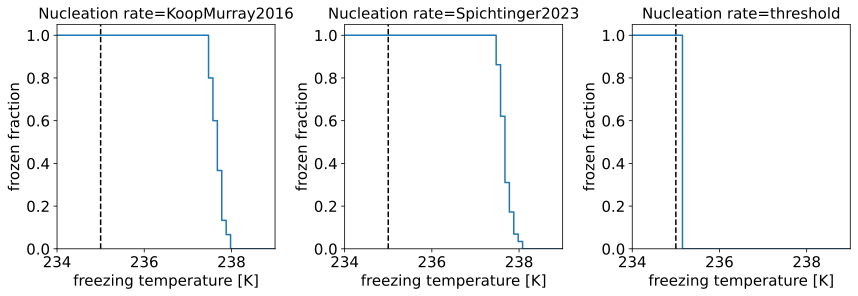

In [4]:
fig, axs = pyplot.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
axs = axs.ravel()
i = 0
for simulation in simulations:
    axs[i] = plot.plot_freezing_temperatures_histogram(axs[i], simulation)
    i += 1
show_plot("fig_simple_hom_freezing_histogram")